In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [10]:
X = np.linspace(0,1)

In [4]:
def ret(val):
    return 0.2*val + 0.075*(1-val)

def std(val):
    return np.sqrt((val**2)*0.01 + ((1-val)**2)*0.000625 + 2*val*(1-val)*0.0025)

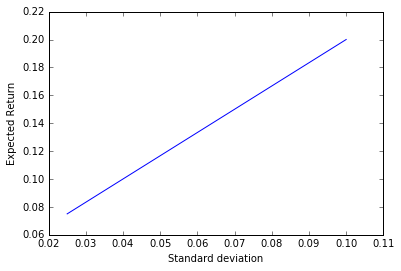

In [15]:
plt.plot(std(X),ret(X))
plt.ylabel('Expected Return')
plt.xlabel('Standard deviation')
plt.savefig('FE_312_HW1_g1.png')

In [60]:
A = (0.1-0.06)/(0.5*0.15**2)
ra = 0.1
rf = 0.06
#stdev of risky portfolio
s = 0.15
def cap(sa):
    #sa is the std of the combined portfolio
    w = sa/s
    print w
    return w*ra + (1-w)*rf
def ind(a,sa):
    w_opt = (ra-rf)/(a*s**2)
    # using known values to compute utility of indifference curve
    ret = w_opt*ra + (1-w_opt)*rf
    util = ret - 0.5*a*(w_opt*s)**2
    return util + 0.5*a*sa**2

[ 0.          0.04081633  0.08163265  0.12244898  0.16326531  0.20408163
  0.24489796  0.28571429  0.32653061  0.36734694  0.40816327  0.44897959
  0.48979592  0.53061224  0.57142857  0.6122449   0.65306122  0.69387755
  0.73469388  0.7755102   0.81632653  0.85714286  0.89795918  0.93877551
  0.97959184  1.02040816  1.06122449  1.10204082  1.14285714  1.18367347
  1.2244898   1.26530612  1.30612245  1.34693878  1.3877551   1.42857143
  1.46938776  1.51020408  1.55102041  1.59183673  1.63265306  1.67346939
  1.71428571  1.75510204  1.79591837  1.83673469  1.87755102  1.91836735
  1.95918367  2.        ]


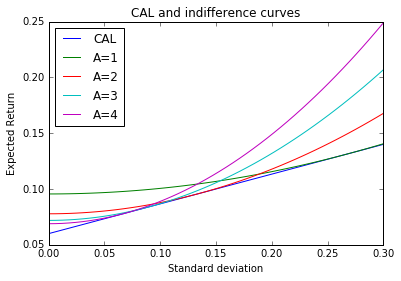

In [61]:
X2 = np.linspace(0,0.3)
plt.plot(X2,cap(X2),X2,ind(1,X2),X2,ind(2,X2),X2,ind(3,X2),X2,ind(4,X2))
plt.ylabel('Expected Return')
plt.xlabel('Standard deviation')
plt.title('CAL and indifference curves')
plt.legend(['CAL','A=1','A=2','A=3','A=4'],loc='upper left')
plt.savefig('FE_312_HW1_g2.png')

In [65]:
def helper(w,ra,rf,rb):
    if (w>1):
        #If borrowing, the cost is rb* amount borrowed
        return w*ra + (1-w)*rf + (1-w)*rb
    return w*ra + (1-w)*rf

def cap2(sa,ra=0.2,s=0.4,rf=0.05,rb=0.06):
    #sa is the std of the combined portfolio
    w = sa/s
    return map(lambda x: helper(x,ra,rf,rb),w)

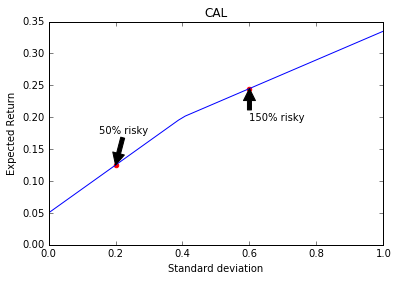

In [84]:
plt.plot(X,cap2(X))
plt.scatter([0.2],cap2(np.array([0.2])),color='r')
plt.scatter([0.6],cap2(np.array([0.6])),color='r')
plt.ylabel('Expected Return')
plt.xlabel('Standard deviation')
plt.title('CAL')
plt.xlim(0,1)
plt.annotate('50% risky',xy=(0.2,cap2(np.array([0.2]))[0]),xytext=(0.15,cap2(np.array([0.2]))[0]+0.05),arrowprops=dict(facecolor='black',shrink=1),)
plt.annotate('150% risky',xy=(0.6,cap2(np.array([0.6]))[0]),xytext=(0.6,cap2(np.array([0.6]))[0]-0.05),arrowprops=dict(facecolor='black',shrink=1),)
plt.savefig('FE_312_HW1_g3.png')

In [113]:
import pandas as pd
file1 = 'bitbootcamp/F-F_Research_Data_Factors.csv'
file2 = 'bitbootcamp/F-F_Research_Data_Factors_weekly.csv'
file3 = 'bitbootcamp/F-F_Research_Data_Factors_daily.csv'

In [150]:
df = pd.read_csv(file1,skiprows=3)

TypeError: data type not understood

In [142]:
df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [143]:
monthly = df.iloc[0:1085]

In [144]:
yearly = df.iloc[1087:-1]

In [156]:
weekly = pd.read_csv(file2,skiprows=4).iloc[0:-1]
daily = pd.read_csv(file3,skiprows=4).iloc[0:-1]

In [160]:
for frame in [daily,weekly,monthly,yearly]:
    frame['Unnamed: 0'] = frame['Unnamed: 0'].astype('int') 
    frame['Mkt-RF'] = frame['Mkt-RF'].astype('float') 

C:\Users\Robert\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Robert\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [161]:
daily.describe()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
count,2.386800e+04,23868.00000,23868.000000,23868.000000,23868.000000
mean,1.969758e+07,0.02873,0.005307,0.016929,0.012590
std,2.647198e+05,1.06795,0.585331,0.585240,0.012055
min,1.926070e+07,-17.44000,-11.600000,-5.980000,-0.003000
25%,1.946072e+07,-0.40000,-0.240000,-0.230000,0.001000
50%,1.969081e+07,0.06000,0.020000,0.010000,0.010000
75%,1.993032e+07,0.49000,0.270000,0.260000,0.020000
max,2.016113e+07,15.76000,8.210000,8.430000,0.061000


In [162]:
weekly.describe()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
count,4.717000e+03,4717.000000,4717.000000,4717.000000,4717.000000
mean,1.971273e+07,0.141929,0.036012,0.088859,0.069384
std,2.610216e+05,2.458448,1.257483,1.434902,0.063359
min,1.926070e+07,-18.850000,-10.660000,-11.920000,-0.016000
25%,1.949021e+07,-1.050000,-0.600000,-0.590000,0.008000
50%,1.971092e+07,0.310000,0.020000,0.040000,0.060000
75%,1.994042e+07,1.400000,0.650000,0.680000,0.107000
max,2.016112e+07,17.040000,9.770000,15.320000,0.335000


In [163]:
monthly.describe()

,Unnamed: 0,Mkt-RF
count,1085.000000,1085.000000
mean,197127.248848,0.651318
std,2611.425418,5.371789
min,192607.000000,-29.130000
25%,194902.000000,-2.020000
50%,197109.000000,0.990000
75%,199404.000000,3.650000
max,201611.000000,38.850000


In [164]:
yearly.describe()

,Unnamed: 0,Mkt-RF
count,89.000000,89.000000
mean,1971.000000,8.303596
std,25.836021,20.585856
min,1927.000000,-45.110000
25%,1949.000000,-6.060000
50%,1971.000000,10.660000
75%,1993.000000,22.120000
max,2015.000000,57.050000


In [166]:
years = []
for i in np.arange(192600,201700,1000):
    years.append(monthly[(monthly['Unnamed: 0']>i)&(monthly['Unnamed: 0']<i+1000)])

In [167]:
len(years)

10

In [187]:
years[0].describe()

,Unnamed: 0,Mkt-RF
count,114.000000,114.000000
mean,193080.342105,0.667719
std,275.959399,9.985741
min,192607.000000,-29.130000
25%,192811.250000,-3.622500
50%,193103.500000,0.935000
75%,193307.750000,5.300000
max,193512.000000,38.850000


In [188]:
years[1].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,194056.500000,0.905417
std,288.453279,6.167386
min,193601.000000,-23.820000
25%,193806.750000,-1.770000
50%,194056.500000,1.250000
75%,194306.250000,4.845000
max,194512.000000,23.870000


In [171]:
years[2].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,195056.500000,1.137917
std,288.453279,3.715515
min,194601.000000,-10.170000
25%,194806.750000,-1.670000
50%,195056.500000,1.310000
75%,195306.250000,4.065000
max,195512.000000,9.380000


In [172]:
years[3].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,196056.500000,0.732333
std,288.453279,3.394295
min,195601.000000,-8.650000
25%,195806.750000,-1.352500
50%,196056.500000,1.415000
75%,196306.250000,3.010000
max,196512.000000,10.870000


In [173]:
years[4].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,197056.500000,-0.120917
std,288.453279,4.818719
min,196601.000000,-12.740000
25%,196806.750000,-3.330000
50%,197056.500000,-0.100000
75%,197306.250000,3.392500
max,197512.000000,16.100000


In [174]:
years[5].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,198056.500000,0.597000
std,288.453279,4.358961
min,197601.000000,-12.900000
25%,197806.750000,-1.802500
50%,198056.500000,0.340000
75%,198306.250000,3.570000
max,198512.000000,12.160000


In [175]:
years[6].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,199056.500000,0.759667
std,288.453279,4.349549
min,198601.000000,-23.240000
25%,198806.750000,-1.665000
50%,199056.500000,1.130000
75%,199306.250000,3.547500
max,199512.000000,12.470000


In [176]:
years[7].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,200056.500000,0.540417
std,288.453279,4.674583
min,199601.000000,-16.080000
25%,199806.750000,-2.460000
50%,200056.500000,1.255000
75%,200306.250000,4.055000
max,200512.000000,8.220000


In [178]:
years[8].describe()

,Unnamed: 0,Mkt-RF
count,120.000000,120.000000
mean,201056.500000,0.608583
std,288.453279,4.457854
min,200601.000000,-17.230000
25%,200806.750000,-1.810000
50%,201056.500000,1.235000
75%,201306.250000,3.232500
max,201512.000000,11.350000


In [179]:
years[9].describe()

,Unnamed: 0,Mkt-RF
count,11.000000,11.000000
mean,201606.000000,1.028182
std,3.316625,3.431369
min,201601.000000,-5.770000
25%,201603.500000,-0.060000
50%,201606.000000,0.500000
75%,201608.500000,2.865000
max,201611.000000,6.960000


In [189]:
import numpy as np
import scipy as sp
import scipy.stats

In [193]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*data
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [194]:
confs = []
for year in years:
    data = year['Mkt-RF'].as_matrix()
    confs.append(mean_confidence_interval(data))

In [195]:
confs

[(0.66771929824561438, -1.1851802591282412, 2.5206188556194702),
 (0.90541666666666676, -0.20938503871865111, 2.0202183720519846),
 (1.1379166666666667, 0.46630931254415031, 1.809524020789183),
 (0.73233333333333328, 0.11878885548937979, 1.3458778111772869),
 (-0.12091666666666664, -0.99193651741903799, 0.75010318408570464),
 (0.59699999999999986, -0.19091522004496608, 1.3849152200449657),
 (0.75966666666666649, -0.026547165853656685, 1.5458804991869897),
 (0.54041666666666666, -0.30454956650838871, 1.3853828998417219),
 (0.60858333333333337, -0.19720742470324704, 1.4143740913699139),
 (1.0281818181818181, -1.277043551027097, 3.3334071873907334)]

In [198]:
data = daily['Mkt-RF'].as_matrix()*250
print mean_confidence_interval(data)

(7.1825247192894253, 3.795230387221149, 10.569819051357701)


In [199]:
data = weekly['Mkt-RF'].as_matrix()*52
print mean_confidence_interval(data)

(7.380317998728005, 3.7311736286783148, 11.029462368777695)


In [201]:
data = monthly['Mkt-RF'].as_matrix()*12
print mean_confidence_interval(data)

(7.8158156682027649, 3.9759273389947931, 11.655703997410736)


In [202]:
data = yearly['Mkt-RF'].as_matrix()
print mean_confidence_interval(data)

(8.3035955056179791, 3.9671374247403488, 12.640053586495609)


In [204]:
data = daily['Mkt-RF'].as_matrix()*250
data

array([  25. ,  112.5,   42.5, ..., -160. ,   27.5,  -62.5])

In [209]:
ts = []
for year in years:
    t = []
    data = year['Mkt-RF'].as_matrix()
    for year2 in years:
        data2 = year2['Mkt-RF'].as_matrix()
        t.append(scipy.stats.ttest_ind(data,data2))
    ts.append(t)

In [210]:
ts

[[Ttest_indResult(statistic=0.0, pvalue=1.0),
  Ttest_indResult(statistic=-0.22026993993652333, pvalue=0.82585463616914034),
  Ttest_indResult(statistic=-0.48193240321374642, pvalue=0.63030828433219688),
  Ttest_indResult(statistic=-0.066934902175384808, pvalue=0.9466911744834372),
  Ttest_indResult(statistic=0.77537472252161455, pvalue=0.43890788291956218),
  Ttest_indResult(statistic=0.070808667647209833, pvalue=0.94361103277860703),
  Ttest_indResult(statistic=-0.092096771116425211, pvalue=0.92670062801466335),
  Ttest_indResult(statistic=0.12589462443022501, pvalue=0.89992436867573078),
  Ttest_indResult(statistic=0.058984939387551075, pvalue=0.95301487888833392),
  Ttest_indResult(statistic=-0.11866690403369125, pvalue=0.90573284197491233)],
 [Ttest_indResult(statistic=0.22026993993652333, pvalue=0.82585463616914034),
  Ttest_indResult(statistic=0.0, pvalue=1.0),
  Ttest_indResult(statistic=-0.35373167769802699, pvalue=0.7238531315247283),
  Ttest_indResult(statistic=0.26933293383

In [226]:
stds = []
for i in np.arange(19260000,20170000,10000):
    stds.append(np.std(daily[(daily['Unnamed: 0']>i)&(daily['Unnamed: 0']<i+100000)]['Mkt-RF'].as_matrix(),ddof=0))

In [227]:
stds

[1.7214804981403167,
 1.6957313976218187,
 1.7653475159947913,
 1.8218134813525921,
 1.7509585212128038,
 1.732915302153009,
 1.620697441911815,
 1.3813370776641016,
 1.1453698778918153,
 1.0735950844026738,
 1.0555675785557579,
 1.0878879116016102,
 0.9871663469965164,
 0.87461385446761464,
 0.79609637324751736,
 0.75269231796972824,
 0.73929727482443441,
 0.72323568156607798,
 0.71331041520593663,
 0.71867933665157735,
 0.73091922505143758,
 0.65311822925058305,
 0.66034646950160525,
 0.63342260084333923,
 0.63282187291352709,
 0.61208676689841746,
 0.60438040150640604,
 0.6777556399448974,
 0.67726900875380813,
 0.66626831978464196,
 0.63202504986256813,
 0.64096934522659743,
 0.60958494324386348,
 0.61355619698897068,
 0.6250814298731201,
 0.67167580100588964,
 0.68519509273548307,
 0.61907814425964836,
 0.67338480535122003,
 0.78690116519211684,
 0.83108549126234421,
 0.8243697479708666,
 0.8245381730314737,
 0.83664555058614931,
 0.83698340389238313,
 0.84021866294706427,
 0.8544

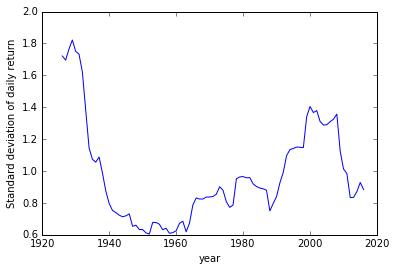

In [228]:
plt.plot(np.arange(1926,2017,1),stds)
plt.xlabel('year')
plt.ylabel('Standard deviation of daily return')
plt.savefig('FE_312_HW1_g3.png')